# Bike sharing project 🐼

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("darkgrid")

##  Bikeshare Dataset

Read data from files

In [2]:
df_bike = pd.read_csv("train.csv", index_col=0, parse_dates=True)
df_bike_test = pd.read_csv("test.csv", index_col=0, parse_dates=True)

In [3]:
# Take a look at the first few rwos of df_bike
df_bike.head(5)
#df_bike_test.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Reset the index

In [4]:
df = df_bike.reset_index(drop=False)

df_test_original = df_bike_test

df_test = df_bike_test.reset_index(drop=False)

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Extraxt cateorical data from datetime

In [5]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df = df.drop(columns=['datetime'])


df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.dayofweek
df_test['hour'] = df_test['datetime'].dt.hour
df_test = df_test.drop(columns=['datetime'])

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,2,22


## Examine column 'windspeed'

In [6]:
wind =  df['windspeed'].value_counts()
#df_bike.loc[df_bike['windspeed'] == 40.9973]
wind

# There are lost cells with zero but when we look at the date closer,
# it seems that when the speed is less than a certain value, it is considered as zero


0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

# Check the corelation matrices

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_476879/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16,-0.00,0.97,-0.01,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01,0.01,0.00,-0.19,-0.00
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01,-0.00,-0.00,-0.70,0.00
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13,-0.01,0.01,-0.05,-0.02
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.06,0.26,-0.04,0.15
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39,0.06,0.26,-0.04,0.14
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32,-0.08,0.20,-0.03,-0.28
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10,-0.02,-0.15,-0.02,0.15
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69,0.15,0.09,0.25,0.30
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97,0.26,0.17,-0.08,0.38


In [8]:
# 'atemp' and 'temp' are highly corelated that's why we drop it
# I do not drop 'casual' and 'registered' as I want to do two seperate model using them


df = df.drop(columns="atemp")



df_test = df_test.drop(columns="atemp")

#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Take a look at the structure of ths data sets

In [9]:
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,2,19
10882,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,2,20
10883,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,2,21
10884,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,2,22


In [10]:
df_test

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,56,11.0014,2011,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,0,19
6489,1,0,1,2,10.66,60,11.0014,2012,12,0,20
6490,1,0,1,1,10.66,60,11.0014,2012,12,0,21
6491,1,0,1,1,10.66,56,8.9981,2012,12,0,22


# Import necessary libraries to implelemnt column transformations

In [11]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures




#poly = PolynomialFeatures(2)
    
poly_and_scale = make_pipeline(PolynomialFeatures(degree=8), MinMaxScaler())    

impute_and_scale = make_pipeline(SimpleImputer(), MinMaxScaler())




# column transfirmation for 'casual'


ct_casual = ColumnTransformer([
    ('do_nothing', 'passthrough', ['season', 'holiday', 'weather','workingday','month','year']),
#    ('OneHot and impute', onehot_and_impute, ['season', 'holiday', 'weather','workingday','year','month','day']),
    ('poly and scale', poly_and_scale, ['hour','temp','day']),
    ('impute and scale', impute_and_scale, ['windspeed','humidity']),
])



# column transfirmation for 'registered'


ct_registered = ColumnTransformer([
    ('do_nothing', 'passthrough', ['season', 'holiday', 'weather','workingday','month','day','year']),
#    ('OneHot and impute', onehot_and_impute, ['season', 'holiday', 'weather','workingday','year','month','day']),
    ('poly and scale', poly_and_scale, ['hour','temp']),
    ('impute and scale', impute_and_scale, ['windspeed','humidity']),
])




# fit the data set

ct_casual.fit(df)                   
X_casual = ct_casual.transform(df) 

ct_registered.fit(df)                   
X_registered = ct_registered.transform(df) 


#ct_casual.fit(df_test)

X_test_casual_fe = ct_casual.transform(df_test)

#ct_registered.fit(df_test)
X_test_registered_fe = ct_registered.transform(df_test)


#print(X_test_casual_fe)
#ct.fit(test)
#test_fe = ct.transform(test)

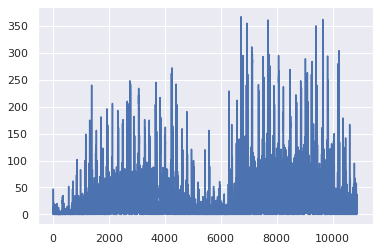

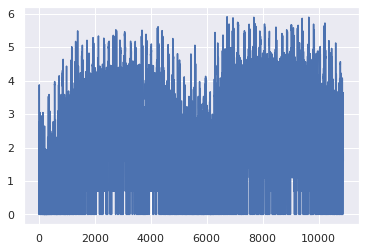

In [12]:
X_casual = X_casual

X_registered = X_registered

Y_casual_original = df[['casual']]




Y_casual = np.log(1+ df[['casual']])



#Y_casual =  df[['casual']]



Y_registered = np.log(1 + df[['registered']])




#plt.plot(Y_casual_original)

#plt.plot(Y_casual)


f1 = plt.figure()
plt.plot(Y_casual_original)
f2 = plt.figure()
plt.plot(Y_casual)

#Y_casual_original



#len(Y_casual)

# Split the data and implement Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import PoissonRegressor
from sklearn import linear_model
import pylab as plt


# obtain train and test data for X and Y_casual
X_train_casual, X_test_casual, Y_train_casual, Y_test_casual = train_test_split(X_casual, Y_casual, test_size=0.20, random_state=43)


# obtain train and test data for X and Y_casual
X_train_registered, X_test_registered, Y_train_registered, Y_test_registered = train_test_split(X_registered, Y_registered, test_size=0.20, random_state=43)



m = LinearRegression()

m1 = LinearRegression()

#Y_train_casual_log = np.log(1 + Y_train_casual)

#Y_train_registered_log = np.log(1 + Y_train_registered)


#Y_train_casual_sin = np.sin(600*3.14*Y_train_casual)


#Y_train_registered_log

#print(Y_train_registered_log)

#Y_train_registered_log


m.fit(X_train_casual, Y_train_casual)


m1.fit(X_train_registered, Y_train_registered)


#mp.predict(X)





ypred_casual_log = m.predict(X_test_casual_fe)

ypred_registered_log = m1.predict(X_test_registered_fe)





ypred_casual = (np.exp(ypred_casual_log) - 1)





ypred_registered = (np.exp(ypred_registered_log) - 1)



#ypred = m.predict(X_test)
#print(ypred_registered[1:34])



# post-processesing: round to the nearest integer

k = 0

for i in ypred_casual:
    ypred_casual[k] = round(i[0]) 
    k = k +1

  


k = 0

for i in ypred_registered:
    ypred_registered[k] = round(i[0])  
    k = k +1    
    
 

ypred = ypred_casual + ypred_registered 



Y_train_casual.shape

#m.score(X_train_casual, Y_train_casual_log)
#m1.score(X_train_registered, Y_train_registered_log)

(8708, 1)

# Write the result to csv file

In [14]:
import csv

# open the file in the write mode
f = open('bike_predictions.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file

index = list(df_test_original.index)



result = pd.DataFrame (index, columns = ['Datetime'])
result.insert(1,'count',ypred)



result.to_csv('bike_predictions.csv', index=False)

f.close()